In [10]:
from matplotlib.animation import PillowWriter

In [6]:
import pickle

In [7]:
import pickle
with open('anim_x.pickle', 'rb') as handle:
    anim_x = pickle.load(handle)

In [5]:
anim_x['DDPG_100K'].shape,anim_x['Untrained'].shape

((23, 159), (23, 149))

In [46]:

trained,untrained=anim_x['DDPG_100K'][:,i],anim_x['Untrained'][:,i]

In [59]:
utr_x,utr_y=untrained[:-1][:(num_seg+1)],untrained[:-1][(num_seg+1):]
utr_x,tr_x

(array([ 0.04879751,  0.21020968,  0.42380454,  0.59870404,  0.65517716,
         0.69741783,  0.68705267,  0.61861549,  0.53444238,  0.49134166,
        44.28372259]),
 array([ 0.04879751,  0.21020968,  0.42380454,  0.59870404,  0.65517716,
         0.69741783,  0.68705267,  0.61861549,  0.53444238,  0.49134166,
        44.28372259]))

In [39]:
rew_train=anim_x['DDPG_100K'][10,:]

In [51]:
rew_untrain=anim_x['Untrained'][10,:]

In [41]:
np.where(rew_train==0)

(array([ 0, 62, 82], dtype=int64),)

In [45]:
rew_train[62:82]+=rew_train[61]

In [48]:
rew_train[82:]+=rew_train[81]

In [52]:
np.where(rew_untrain==0)

(array([ 0, 50, 99], dtype=int64),)

In [53]:
rew_untrain[50:99]+=rew_untrain[49]

In [54]:
rew_untrain[99:]+=rew_untrain[98]

In [29]:
round(traffic_state[-1],2)

0.3

In [ ]:
rew_untrain,rew_train

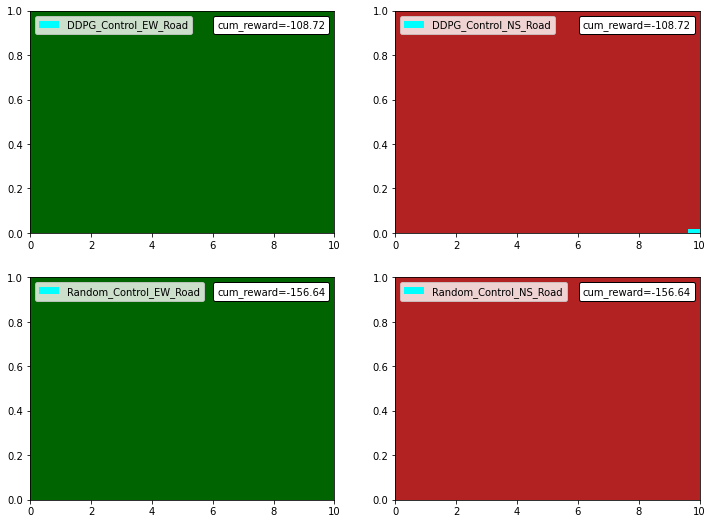

In [58]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,9))

def animate(i,num_seg=10):
    trained,untrained=anim_x['DDPG_100K'][:,i],anim_x['Untrained'][:,i]
    tr_sig=trained[-1]
    utr_sig=untrained[-1]
    tr_x,tr_y=trained[:-1][:(num_seg+1)],trained[:-1][(num_seg+1):]
    utr_x,utr_y=untrained[:-1][:(num_seg+1)],untrained[:-1][(num_seg+1):]
    cols=[]
    
    if bool(tr_sig):
        cols+=['firebrick','darkgreen']
        
    else:
        cols+=['darkgreen','firebrick']
    if bool(utr_sig):
        cols+=['firebrick','darkgreen']
        
    else:
        cols+=['darkgreen','firebrick']
    rews=[rew_train[i],rew_train[i],rew_untrain[i],rew_untrain[i]]

    axs=[]
    for col,rew,axis,traffic_state,label in zip(cols,rews,ax.flatten(),[tr_x,tr_y,utr_x,utr_y],["DDPG_Control_EW_Road","DDPG_Control_NS_Road",
                                                                          "Random_Control_EW_Road","Random_Control_NS_Road"]):
        axis.clear()
        axis.set_xlim(0,10)
        axis.set_ylim(0,1)
    
        axis.bar(np.linspace(0,10,10),traffic_state[:-1],label=label,color='cyan')
        axis.legend(loc='upper left')
        at = AnchoredText(
        "cum_reward=-"+str(round(rew,2)), prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        axis.add_artist(at)
        axis.set_facecolor(col)
        axs.append(axis)
    return axs

ani =FuncAnimation(fig, animate, interval=40, blit=False, repeat=False, frames=min([anim_x[model].shape[-1] for model in anim_x]))    
ani.save("anim_sparse_Y.gif", dpi=300, writer=PillowWriter(fps=1))

In [2]:
type(animate(10))

tuple